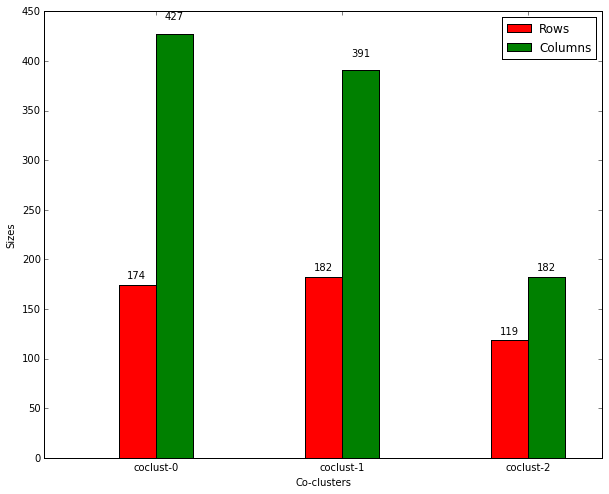

In [24]:
%matplotlib inline
import numpy as np, scipy.sparse as sp
from scipy.sparse import coo_matrix
from coclust.CoclustSpecMod import CoclustSpecMod
import matplotlib.pyplot as plt

n_clust=3
file_name = "../datasets/cstr.csv"

# Load the csv file and build the matrix. It may take a few seconds
a=np.loadtxt(file_name,delimiter=',', skiprows=1)
X=(coo_matrix((a[:,2], (a[:,0].astype(int),a[:,1].astype(int)) ) )).tocsr()

# Perform co-clustering
model = CoclustSpecMod(n_clusters=n_clust)
model.fit(X)


def plot_cluster_sizes(model) : 
  fig = plt.figure(figsize=(10,8))
  ax = fig.add_subplot(111)
  colors=['r','g','b']        
  x=[] ; y=[]        
  for i in range(n_clust):
        number_of_rows, number_of_columns = model.get_shape(i)
        x.append( number_of_rows)
        y.append(number_of_columns)
  data=[x,y]
  shift=.8 / len(data*2)
  location=np.arange(n_clust)
  legend_rects=[]
  for i in range(2) :
     cols=ax.bar(location+i * shift , data[i] , width=shift, color=colors[i % len(colors)], align='center')
     legend_rects.append(cols[0])
     for c in cols :
        h=c.get_height()
        ax.text(c.get_x()+c.get_width()/2., 1.03*h, '%d'%int(h),
                ha='center', va='bottom')
  ax.set_xticks(location + (shift/2.))
  ax.set_xticklabels(['coclust-' + str(i) for i in range(n_clust)])
  plt.xlabel('Co-clusters')
  plt.ylabel('Sizes')
  ax.legend(legend_rects, ('Rows', 'Columns'))
    

plot_cluster_sizes(model)

In [3]:
plt.

In [ ]:
# Evaluate
predicted_row_labels = model.row_labels_
import json
with open("../datasets/classic3.labels",'r') as f :
        true_row_labels=np.array(json.load(f))
# Use the computed and true row labels to compute the NMI
#from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
#print("NMI:", nmi(true_row_labels, predicted_row_labels))